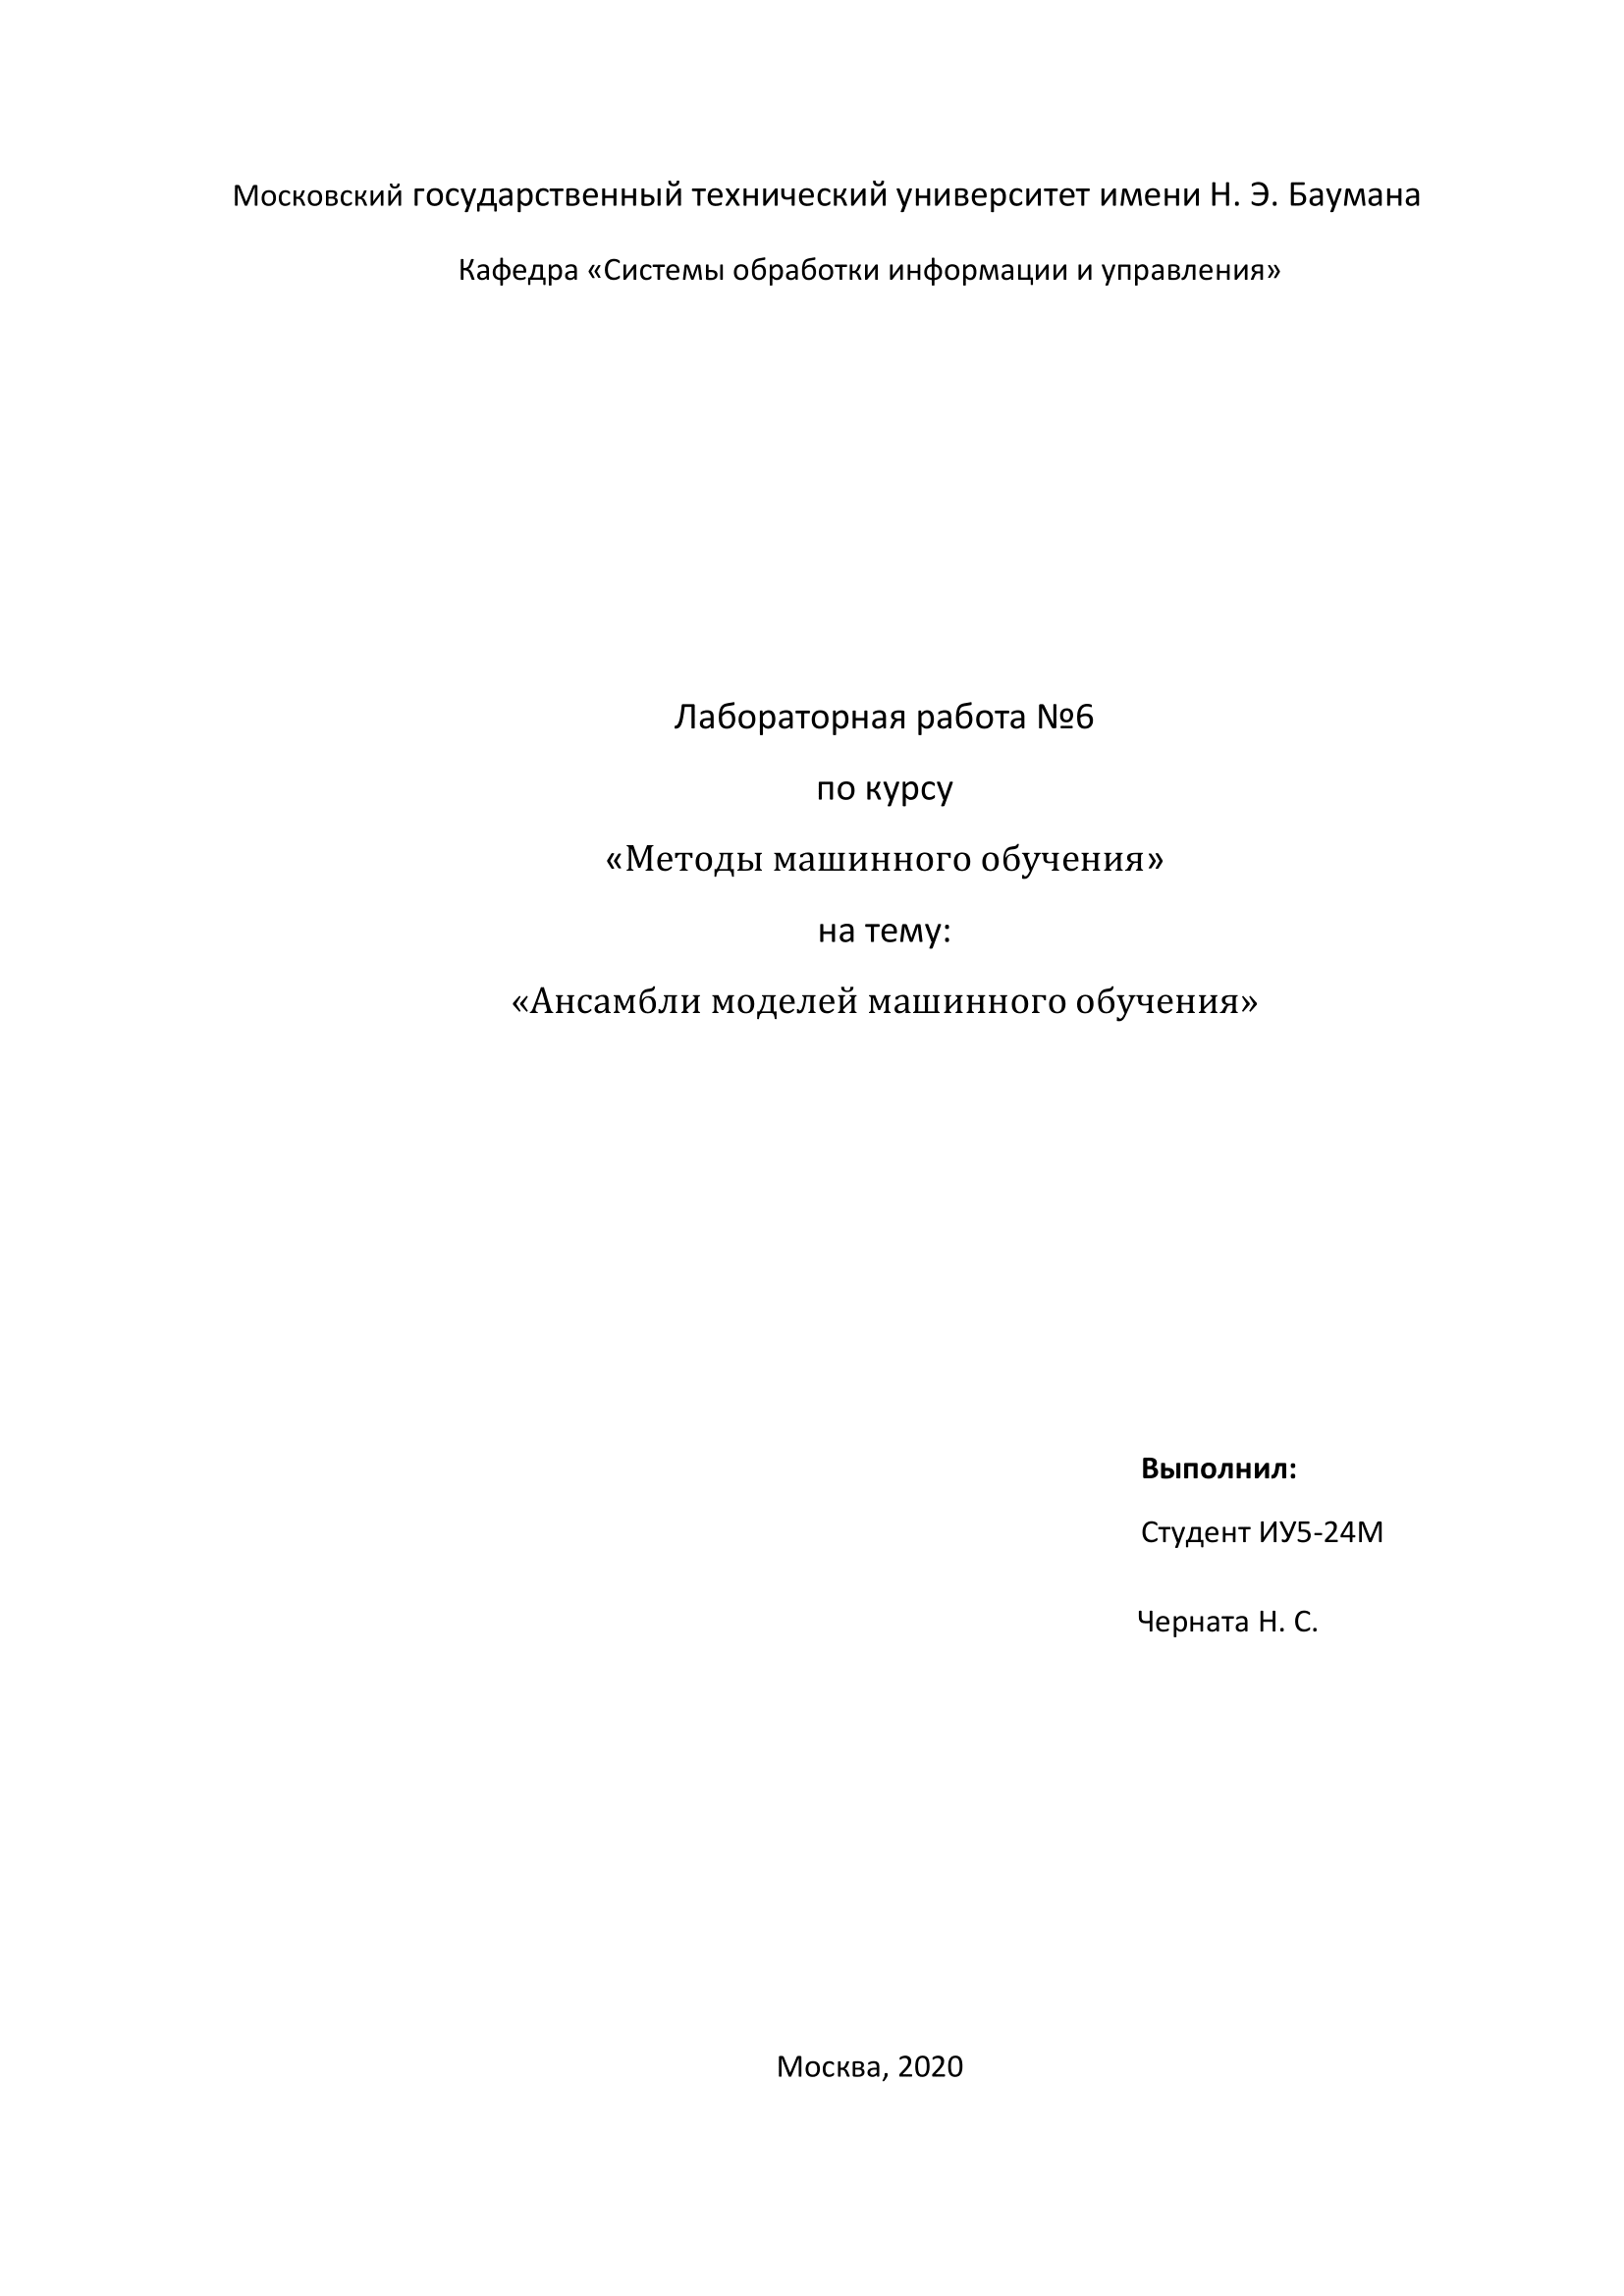

## Задание:
* Выберите набор данных (датасет) для решения задачи классификации или регресии.
* В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
* С использованием метода train_test_split разделите выборку на обучающую и тестовую.
* Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.
* Произведите для каждой модели подбор значений одного гиперпараметра. В зависимости от используемой библиотеки можно применять * функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
* Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score, r2_score 

In [3]:
data = pd.read_csv("data/Admission_Predict_Ver1.1.csv")

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data_X = data[["CGPA", "TOEFL Score", "University Rating"]]

In [8]:
data_X

,CGPA,TOEFL Score,University Rating
0,9.65,118,4
1,8.87,107,4
2,8.00,104,3
3,8.67,110,3
4,8.21,103,2
...,...,...,...
495,9.02,108,5
496,9.87,117,5
497,9.56,120,5
498,8.43,103,4


In [9]:
data_Y = data[["Chance of Admit "]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data_X, data_Y, test_size=0.25, random_state=1)

In [11]:
# Качество отдельных моделей
def val_mae(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_test, 'g.')
    plt.plot(X_test, y_pred, 'ro')
    plt.show()
    result = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(model)
    print('MAE={}'.format(result))
    print('R2={}'.format(r2))

c:\users\ncher\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


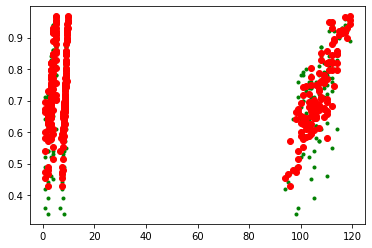

GradientBoostingRegressor()
MAE=0.05018946886061301
R2=0.7288949295990995




c:\users\ncher\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


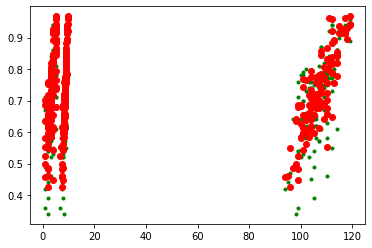

RandomForestRegressor(n_estimators=50)
MAE=0.05431536000000001
R2=0.6934410032452829




In [12]:
for model in [
    GradientBoostingRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model)
    print('==========================\n\n')

## Модель градиентного бустинга показала лучший результат на тестовой выборке

In [13]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [14]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished
c:\users\ncher\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [15]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [16]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    error = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print('Model Performance')
    print('MAE: {:0.4f}'.format(error))
    print('R2 score: {:0.4f}'.format(r2))
    print('======================\n\n')

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
evaluate(base_model, X_test, y_test)

Model Performance
MAE: 0.0534
R2 score: 0.7026




c:\users\ncher\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [17]:
best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

Model Performance
MAE: 0.0509
R2 score: 0.7375




Видно, что подбор гиперпараметров улучшил нашу модель, уменьшив ошибку  на 0.0025

In [18]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid_Booster = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }


In [19]:
gb = GradientBoostingRegressor()

gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid_Booster, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

gb_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished
c:\users\ncher\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [20]:
gb_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

In [21]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    error = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print('Model Performance')
    print('MAE: {:0.4f}'.format(error))
    print('R2 score: {:0.4f}'.format(r2))
    print('======================\n\n')

base_model = GradientBoostingRegressor()
base_model.fit(X_train, y_train)
evaluate(base_model, X_test, y_test)

Model Performance
MAE: 0.0505
R2 score: 0.7287




c:\users\ncher\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [22]:
best_random = gb_random.best_estimator_
evaluate(best_random, X_test, y_test)

Model Performance
MAE: 0.0598
R2 score: 0.6624




## Подбор параметров в градиентном бустинге не дал прироста качества